In [1]:
# Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [2]:
# Importing and collecting data
linreg=pd.read_csv("./LinReg_Data.csv")
x=linreg.drop(columns=['PE'])
y=linreg['PE']
x=np.array(x)
y=np.array(y)
print(f"Shape of X : {x.shape}")
print(f"Shape of Y : {y.shape}")

Shape of X : (9568, 4)
Shape of Y : (9568,)


In [3]:
# Normalising Data
x = (x - np.mean(x))/np.std(x)
y = (y - np.mean(y))/np.std(y)

#Diving the data into training and testing set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)

In [4]:
n_total = x.shape[0] # Total No. of samples
n_samples = x_train.shape[0] # No. of samples taken for training
n_features = x.shape[1]  # No. of features / No. of values in X
n_targets = 1   # No. of target variables / No. of values in y

# Creating the variables
W = np.zeros((n_targets, n_features))
b = np.zeros((n_targets,1))

print(f"Shape of W : {W.shape}")
print(f"Shape of b : {b.shape}")

Shape of W : (1, 4)
Shape of b : (1, 1)


In [5]:
# Defining the loss function
def loss_fn(y_hat, y):
    return (1/n_samples) * np.sum((y_hat - y)**2)

Epoch: 1, Loss: 0.8448056581351859
Epoch: 2, Loss: 0.5346031619554391
Epoch: 3, Loss: 0.3944064196167968
Epoch: 4, Loss: 0.3238903286628381
Epoch: 5, Loss: 0.2840162865223729
Epoch: 6, Loss: 0.2589399158107953
Epoch: 7, Loss: 0.24179242406224327
Epoch: 8, Loss: 0.22931808229508957
Epoch: 9, Loss: 0.2198085021437337
Epoch: 10, Loss: 0.21227736456615023
Epoch: 11, Loss: 0.2061109955637217
Epoch: 12, Loss: 0.2009077163121665
Epoch: 13, Loss: 0.19639626544375405
Epoch: 14, Loss: 0.19239005524803043
Epoch: 15, Loss: 0.18875933329016834
Epoch: 16, Loss: 0.18541323680904898
Epoch: 17, Loss: 0.18228779984989163
Epoch: 18, Loss: 0.17933776905189824
Epoch: 19, Loss: 0.17653095323042609
Epoch: 20, Loss: 0.1738442976221368
Epoch: 21, Loss: 0.17126114713708332
Epoch: 22, Loss: 0.16876933503852973
Epoch: 23, Loss: 0.16635984678132495
Epoch: 24, Loss: 0.1640258854120745
Epoch: 25, Loss: 0.16176221762127627
Epoch: 26, Loss: 0.15956471604926573
Epoch: 27, Loss: 0.15743003886547302
Epoch: 28, Loss: 0.15

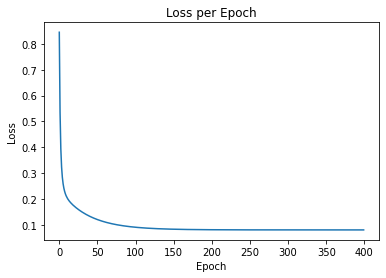

In [6]:
# Initialising W and b
W = np.zeros((n_targets, n_features))
b = np.zeros((n_targets,1))

loss_history = []

# Initialising the learning rate and  epoch
learning_rate =   0.02  #@param {type:"number"}
num_epochs = 400  #@param {type:"slider", min:1, max:400, step:1}

for epoch in range(num_epochs):  
    loss = 0
    for i in range(n_samples):
        x_i, y_i = x_train[i].reshape(-1, 1), y_train[i].reshape(-1, 1)
        
        y_hat = (np.dot(W, x_i) + b)
        
        dL_dy = 2*(y_hat-y_i)
        
        dy_dW = x_i
        dy_db = 1
        
        dL_dW = np.dot(dL_dy, dy_dW.T)
        dL_db = dL_dy * dy_db
        
        #  Gradient Descend
        W = W - learning_rate * dL_dW
        b = b - learning_rate * dL_db
        
        loss += loss_fn(y_hat, y_i)
    
    loss_history.append(loss)
    print(f"Epoch: {epoch+1}, Loss: {loss}")

plt.plot(loss_history)
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [7]:
# Creating a prediction Model
def Linear_Regression(x):
  return (np.dot(W, x) + b)

In [8]:
predict=[]

# Predicting the values for test samples
for i in range(n_total-n_samples):
  predict.append(Linear_Regression(x_test[i].reshape(-1,1)))

predict=np.array(predict)
predict.shape=(1914,)

# Finding the R squared value for accuracy
corr_matrix = np.corrcoef(y_test, predict)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.9325287117072677


In [9]:
# Usig Sklearn's Linear Regression model and fitting out training data in it
regression.fit(x_train, y_train)
W_1, b_1 = regression.coef_, regression.intercept_

print("Shape of W : {}".format(W_1.shape))
print("Shape of b : {}".format(b_1.shape))

loss = 0
for i in range(n_samples):
    y_hat = np.dot(W_1, x_train[i]) + b_1
    loss += loss_fn(y_hat, y_train[i])

print("\nLoss = {}".format(loss))

Shape of W : (4,)
Shape of b : ()

Loss = 0.07219315524722159


In [10]:
predict_1=[]

#Predicting the test values for the Sklearn Linear regression model
for i in range(n_total-n_samples):
  predict_1.append(np.dot(W_1,x_test[i].reshape(-1,1)+ b_1))

predict_1=np.array(predict_1)
predict_1.shape=(1914,)

# Finding the R squared value for accuracy of the model
corr_matrix = np.corrcoef(y_test, predict_1)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print(R_sq)

0.9325336829466628
